In [54]:
# Import libraries 
import plotly
import plotly.express as px

import os
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

import panel as pn
from panel import widgets
from panel.interact import interact
pn.extension("plotly")

%matplotlib inline

In [55]:
# read applicants.csv file into dataframe called applicants_df
file = Path("applicants.csv")
applicants_df = pd.read_csv(file)
applicants_df.head()

Age         Workclass  Education  Education-num      Marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          Occupation   Relationship   Race  Gender  Hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

         Country Salary  
0  United States  <=50K  
1  United States  <=50K  
2  United States  <=50K  
3  United States  <=50K  
4           Cuba  <=50K

In [56]:
# Slice data and get the count of hours worked by Age
hours_age_cnt = applicants_df[["Hours-per-week"]].groupby(applicants_df['Age']).count()

# Rename columns to be 'num_total_hours'
hours_age_cnt.columns = ['Total-hours-per-week']

In [57]:
# plot Total hoours worked per Age group
hours_age_cnt.hvplot(kind='bar', x='Age', y='Total-hours-per-week', width=1200)

:Bars   [Age]   (Total-hours-per-week)

In [58]:
# Slice data and get the count of hours worked by Occupation
hours_occ_cnt = round(applicants_df[["Hours-per-week"]].groupby(applicants_df['Occupation']).mean(), 0)

# Rename columns to be 'num_total_hours'
hours_occ_cnt.columns = ['Average-hours-per-week']
hours_occ_cnt.reset_index()

Occupation  Average-hours-per-week
0        Adm-clerical                    38.0
1        Armed-Forces                    41.0
2        Craft-repair                    43.0
3     Exec-managerial                    45.0
4     Farming-fishing                    47.0
5   Handlers-cleaners                    38.0
6   Machine-op-inspct                    41.0
7       Other-service                    35.0
8     Priv-house-serv                    33.0
9      Prof-specialty                    42.0
10    Protective-serv                    43.0
11              Sales                    41.0
12       Tech-support                    39.0
13   Transport-moving                    45.0

In [59]:
# plot Average hours worked among different occupatoions
hours_occ_cnt.hvplot(kind='bar', x='Occupation', y='Average-hours-per-week', width=1300)

:Bars   [Occupation]   (Average-hours-per-week)

In [67]:
# Create new column that shows Salary-type
applicants_df['Salary-type'] = np.nan

applicants_df.loc[applicants_df['Salary'] == '<=50K', 'Salary-type'] = 'Low'
applicants_df.loc[applicants_df['Salary'] == '>50K', 'Salary-type'] = 'High'

applicants_df.head(40)

Age         Workclass     Education  Education-num         Marital-status  \
0    39         State-gov     Bachelors             13          Never-married   
1    50  Self-emp-not-inc     Bachelors             13     Married-civ-spouse   
2    38           Private       HS-grad              9               Divorced   
3    53           Private          11th              7     Married-civ-spouse   
4    28           Private     Bachelors             13     Married-civ-spouse   
5    37           Private       Masters             14     Married-civ-spouse   
6    49           Private           9th              5  Married-spouse-absent   
7    52  Self-emp-not-inc       HS-grad              9     Married-civ-spouse   
8    31           Private       Masters             14          Never-married   
9    42           Private     Bachelors             13     Married-civ-spouse   
10   37           Private  Some-college             10     Married-civ-spouse   
11   30         State-gov     Bachelors             13     Married-civ-spouse   
12   23           Private     Bachelors             13          Never-married   
13   32           Private    Assoc-acdm             12          Never-married   
14   34           Private       7th-8th              4     Married-civ-spouse   
15   25  Self-emp-not-inc       HS-grad              9          Never-married   
16   32           Private       HS-grad              9          Never-married   
17   38           Private          11th              7     Married-civ-spouse   
18   43  Self-emp-not-inc       Masters             14               Divorced   
19   40           Private     Doctorate             16     Married-civ-spouse   
20   54           Private       HS-grad              9              Separated   
21   35       Federal-gov           9th              5     Married-civ-spouse   
22   43           Private          11th              7     Married-civ-spouse   
23   59           Private       HS-grad              9               Divorced   
24   56         Local-gov     Bachelors             13     Married-civ-spouse   
25   19           Private       HS-grad              9          Never-married   
26   39           Private       HS-grad              9               Divorced   
27   49           Private       HS-grad              9     Married-civ-spouse   
28   23         Local-gov    Assoc-acdm             12          Never-married   
29   20           Private  Some-college             10          Never-married   
30   45           Private     Bachelors             13               Divorced   
31   30       Federal-gov  Some-college             10     Married-civ-spouse   
32   22         State-gov  Some-college             10     Married-civ-spouse   
33   48           Private          11th              7          Never-married   
34   21           Private  Some-college             10          Never-married   
35   19           Private       HS-grad              9      Married-AF-spouse   
36   48  Self-emp-not-inc    Assoc-acdm             12     Married-civ-spouse   
37   31           Private           9th              5     Married-civ-spouse   
38   53  Self-emp-not-inc     Bachelors             13     Married-civ-spouse   
39   24           Private     Bachelors             13     Married-civ-spouse   

           Occupation   Relationship                Race  Gender  \
0        Adm-clerical  Not-in-family               White    Male   
1     Exec-managerial        Husband               White    Male   
2   Handlers-cleaners  Not-in-family               White    Male   
3   Handlers-cleaners        Husband               Black    Male   
4      Prof-specialty           Wife               Black  Female   
5     Exec-managerial           Wife               White  Female   
6       Other-service  Not-in-family               Black  Female   
7     Exec-managerial        Husband               White    Male   
8      Prof-specialty  Not-in-family               White  Female   
9 

In [61]:
# Create new dataframe called salary type that organizes Salary-type by Age
salary_type = applicants_df.drop(columns = ['Workclass', 'Education', 'Education-num', 'Marital-status', 
                                            'Occupation', 'Relationship', 'Race', 'Gender', 'Hours-per-week', 'Country', 'Salary'])

salary_type['Low-Salary'] = np.nan
salary_type['High-Salary'] = np.nan

salary_type.loc[salary_type['Salary-type'] == 'Low', 'Low-Salary'] = 1
salary_type.loc[salary_type['Salary-type'] == 'High', 'Low-Salary'] = 0
salary_type.loc[salary_type['Salary-type'] == 'High', 'High-Salary'] = 1
salary_type.loc[salary_type['Salary-type'] == 'Low', 'High-Salary'] = 0

salary_type.drop(columns = ['Salary-type'])

# Slice data and get the count of number of applicants with high and low saliries by Age group
low_salary = salary_type[['Low-Salary']].groupby(salary_type['Age']).sum()
high_salary = salary_type[['High-Salary']].groupby(salary_type['Age']).sum()

# Rename columns to be 'num_sales' and 'num_foreclosures'
low_salary.columns = ['Total-Low-Salary']
high_salary.columns = ['Total-High-Salary']

# Rename columns to be 'num_total_hours'
salary_type_cnt = pd.concat([low_salary, high_salary], axis=1).dropna().reset_index()
salary_type_cnt.head()

Age  Total-Low-Salary  Total-High-Salary
0   17             244.0                0.0
1   18             351.0                0.0
2   19             441.0                1.0
3   20             474.0                0.0
4   21             481.0                3.0

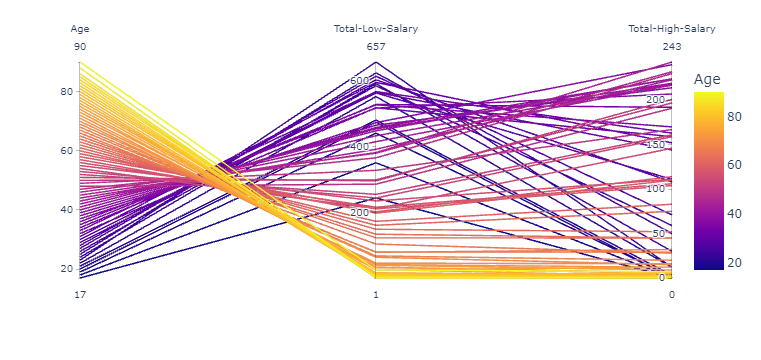

In [62]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(salary_type_cnt, color='Age')

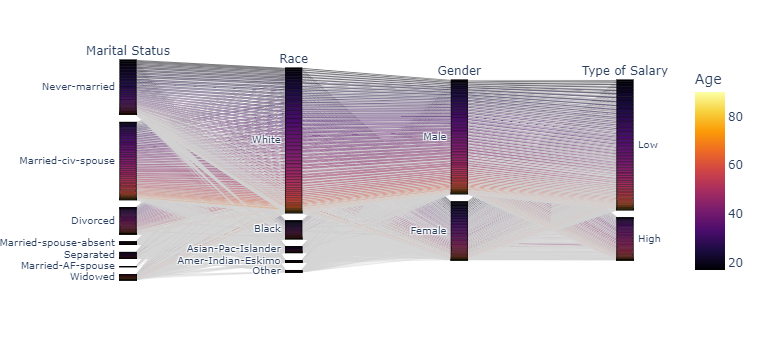

In [63]:
# Plot data using parallel_categories
px.parallel_categories(
    applicants_df,
    dimensions=['Marital-status', 'Race', 'Gender', 'Salary-type'],
    color="Age",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "Marital-status": "Marital Status",
        "Race": "Race",
        "Gender": "Gender",
        "Salary-type": "Type of Salary",
    },
)

In [64]:
#applicants_df.dtypes

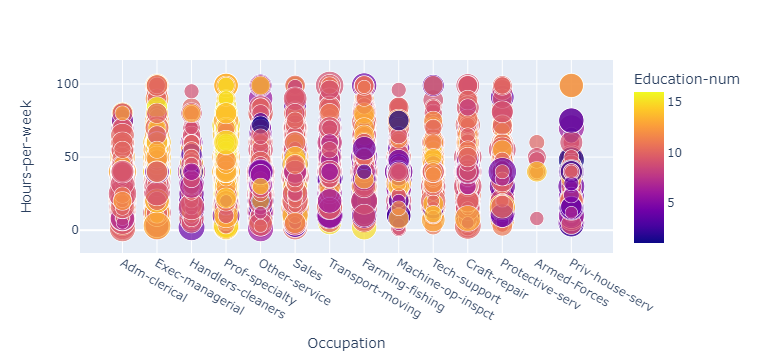

In [65]:
# Create scatter plot comparing Occupation to Hours worked per week
px.scatter(
    applicants_df,
    x= "Occupation",
    y= "Hours-per-week",
    size="Age",
    color="Education-num",
)

In [53]:
sorted_df = applicants_df.sort_values('Education-num')

applicants_df.hvplot.scatter(x='Education-num', y='Hours-per-week', by='Gender', 
                  legend='top', height=400, width=750) + sorted_df.hvplot.box(y='Hours-per-week', by='Education-num', 
                  legend='top', height=400, width=750)

C:\Users\arewa\anaconda3\lib\site-packages\bokeh\models\sources.py:173: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('Hours-per-week', 4611), ('Hours_hyphen_minus_per_hyphen_minus_week', 0), ('index', 4611)



:Layout
   .NdOverlay.I  :NdOverlay   [Gender]
      :Scatter   [Education-num]   (Hours-per-week)
   .BoxWhisker.I :BoxWhisker   [Education-num]   (Hours-per-week)

In [51]:
# Plot globe data of ditribution of hours worked by native-country

"""
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Plot Data
map_plot = px.scatter_mapbox(
    applicants_df,
    lat="Latitude",
    lon="Longitude",
    size="Hours-per-week",
    color="Ages",
    zoom=4
)
"""


'\n# Read the Mapbox API key\nload_dotenv()\nmap_box_api = os.getenv("mapbox")\n\n# Set the Mapbox API\npx.set_mapbox_access_token(map_box_api)\n\n# Plot Data\nmap_plot = px.scatter_mapbox(\n    applicants_df,\n    lat="Latitude",\n    lon="Longitude",\n    size="Hours-per-week",\n    color="Ages",\n    zoom=4\n)\n'